In [13]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
import sqlite3
import numpy as np

In [14]:
# Settings
SEED = 42
SAMPLE_SIZE = 200000
PATH_CSV = './top_200000_songs.csv'
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [15]:
df = pd.read_csv(PATH_CSV, nrows=SAMPLE_SIZE)

/var/folders/z7/66xdhd3933j3cw2f4mxnf19h0000gn/T/ipykernel_13595/2446167011.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(PATH_CSV, nrows=SAMPLE_SIZE)


In [16]:
artist = "Taylor Swift"
artist_df = df[df['artist_names'].str.contains(artist, na=False)].copy()

In [17]:
artist_df['album_names_cleaned'] = artist_df['album_names'].str.replace('[^a-zA-Z0-9\s]', '', regex=True)

In [18]:
desired_albums = ['evermore', '1989', 'Red', 'Fearless', 'folklore']

In [19]:
artist_df = artist_df[artist_df['album_names_cleaned'].isin(desired_albums)].copy()
artist_df = artist_df.reset_index(drop=True)

In [20]:
print(artist_df.columns)
selected_cols = ['duration', 'explicit', 'loudness', 'tempo', 'time_signature', 'key', 'mode', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']
scaler = StandardScaler()
X_selected = scaler.fit_transform(artist_df[selected_cols])

Index(['id', 'name', 'duration', 'explicit', 'popularity', 'analysis_url',
       'loudness', 'tempo', 'time_signature', 'key', 'mode', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness',
       'valence', 'artist_ids', 'artist_names', 'artist_followers',
       'artist_popularity', 'album_ids', 'album_names', 'album_types',
       'album_release_dates', 'album_popularities', 'genres',
       'album_names_cleaned'],
      dtype='object')


In [21]:
pca_artist = PCA(n_components=2, random_state=SEED).fit(X_selected)
round(
    pd.DataFrame(
        pca_artist.components_.T,
        index=selected_cols,
        columns=['PCA1', 'PCA2']
    ),
    3
)

,PCA1,PCA2
duration,0.281,-0.357
explicit,0.187,0.142
loudness,-0.420,-0.262
tempo,-0.055,0.322
time_signature,0.096,0.349
key,-0.066,0.226
mode,0.076,0.081
acousticness,0.426,0.306
danceability,-0.326,0.022
energy,-0.463,-0.001


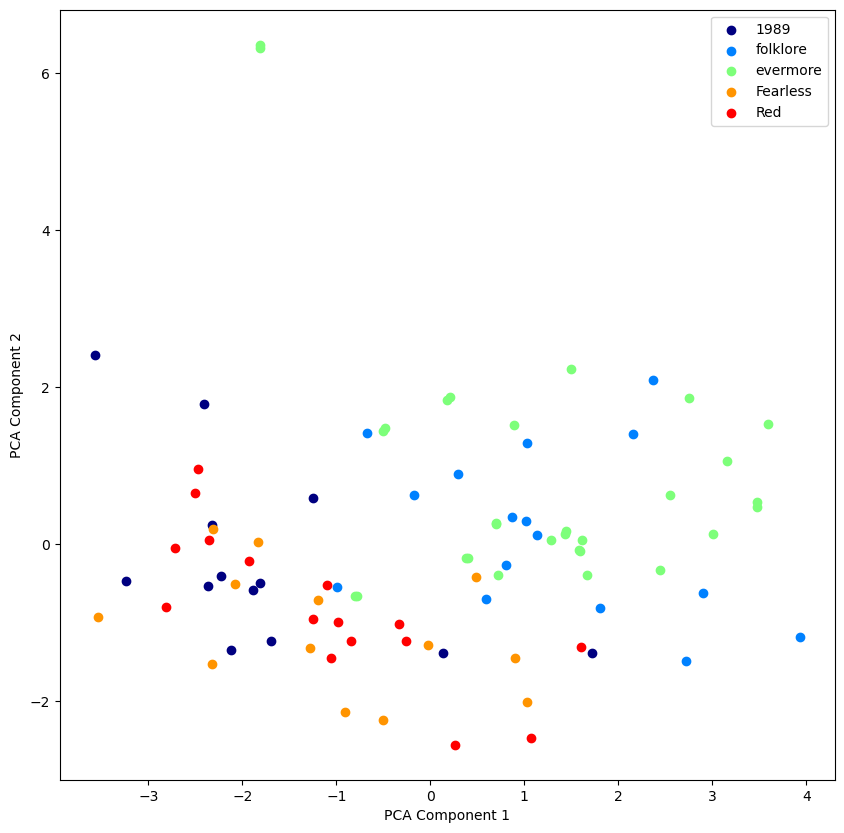

In [22]:
X_artist_pca = pca_artist.transform(X_selected)

# Your list of desired albums
desired_albums = ['evermore', '1989', 'Red', 'Fearless', 'folklore']

# Filter the data based on desired albums
filtered_df = artist_df[artist_df['album_names_cleaned'].isin(desired_albums)]
album_names = filtered_df['album_names_cleaned'].unique()

# Set up colors for each album
colors = plt.cm.jet(np.linspace(0, 1, len(album_names)))

fig, ax = plt.subplots(figsize=(10, 10))

# Iterate through each album to plot points with corresponding color
for album, color in zip(album_names, colors):
    album_indices = filtered_df[filtered_df['album_names_cleaned'] == album].index
    if album == 'Red': # For fun
        ax.scatter(X_artist_pca[album_indices, 0], X_artist_pca[album_indices, 1], c='red', label=album)
    else:
        ax.scatter(X_artist_pca[album_indices, 0], X_artist_pca[album_indices, 1], c=[color], label=album)

# Add labels and legend
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.legend()

'''
# Add text annotations
for i in range(X_selected.shape[0]):
    plt.text(
        x=X_artist_pca[i, 0] + 0.1,
        y=X_artist_pca[i, 1] + 0.1,
        s=artist_df['album_names_cleaned'].iloc[i],
        fontdict=dict(color='red', size=5),
        bbox=dict(facecolor='yellow', alpha=0.5)
    )
'''
plt.show()

[t-SNE] Computing 87 nearest neighbors...
[t-SNE] Indexed 88 samples in 0.000s...
[t-SNE] Computed neighbors for 88 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 88 / 88
[t-SNE] Mean sigma: 2.246471
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.989819
[t-SNE] KL divergence after 850 iterations: 0.256123


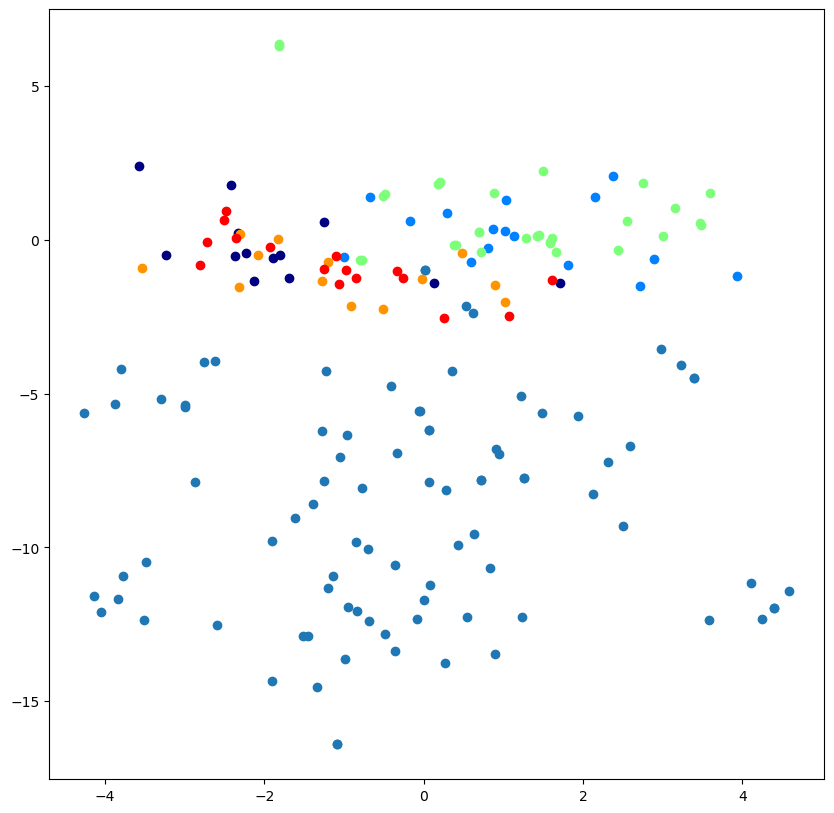

In [23]:
tsne = TSNE(verbose=1, random_state=SEED)
tsne_results = tsne.fit_transform(X_selected)
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(tsne_results[:, 0], y=tsne_results[:, 1])
for album, color in zip(album_names, colors):
    album_indices = filtered_df[filtered_df['album_names_cleaned'] == album].index
    if album == 'Red': # For fun
        ax.scatter(X_artist_pca[album_indices, 0], X_artist_pca[album_indices, 1], c='red', label=album)
    else:
        ax.scatter(X_artist_pca[album_indices, 0], X_artist_pca[album_indices, 1], c=[color], label=album)
'''
for i in range(tsne_results.shape[0]):
    plt.text(
        x=tsne_results[i, 0] + 0.3,
        y=tsne_results[i, 1] + 0.3,
        s=artist_df['album_names_cleaned'][i],
        fontdict=dict(color='red', size=5),
        bbox=dict(facecolor='yellow', alpha=0.5)
    )
'''
plt.show()